## Client Loan Repayment Case Study

This case study aims at applying EDA in a real business scenario. Apart from applying the techniques of EDA, this case study aims at developing a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Problem Statement : 

Identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumer is capable of repaying the loan are not rejected. 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#### Importing the libraries

In [43]:
#Import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
#To display all the columns
pd.set_option('display.max_columns', 122)
# Reading the application_data file
application=pd.read_csv('application_data.csv')

In [46]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Inspection of the Dataframe

In [47]:
start = "\033[1m"
end = "\033[0;0m"
print("\n"+start+"Datatype of each Column"+end+"\n")
print(application.info()) # Datatype of each Column
print("\n"+start+"Summary of operations on numeric columns in dataframe"+end+"\n")
print(application.describe()) #Summary of operations on numeric columns in dataframe
print("\n"+start+"Name of the type of collection"+end+"\n")
print(type(application)) # Returns the name of the type of collection
print("\n"+start+"Number rows and columns"+end+"\n")
print(application.shape) # Returns number rows and columns 
print("\n"+start+"Columns present in Dataframe"+end+"\n")
print(application.columns) # Returns the Columns present in Dataframe
print("\n"+start+"Numpy array of nested list of values"+end+"\n")
print(application.values) #Returns the numpy array of nested list of values


Datatype of each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Summary of operations on numeric columns in dataframe

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
c

[[100002 1 'Cash loans' ... 0.0 0.0 1.0]
 [100003 0 'Cash loans' ... 0.0 0.0 0.0]
 [100004 0 'Revolving loans' ... 0.0 0.0 0.0]
 ...
 [456253 0 'Cash loans' ... 1.0 0.0 1.0]
 [456254 1 'Cash loans' ... 0.0 0.0 0.0]
 [456255 0 'Cash loans' ... 2.0 0.0 1.0]]


## Data Cleaning :
#### Find the null percentage of each column
#### Delete the columns having null percentage > 47%
#### Observations on the columns having null percentage <14%

In [48]:
#Null percentage of each column
pd.set_option('display.max_rows', 122)
print(round((((application.isnull().sum())/len(application.index))*100),2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [49]:
#Dropping the columns having >47% null values
application.drop(application[application.columns[application.isnull().mean() > 0.47]],axis=1,inplace=True)

In [50]:
#Checking the mean null of the remaining columns
pd.set_option('display.max_rows', 122)
print(round((((application.isnull().sum())/len(application.index))*100),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

### Observations on Columns having percentage <14%

#### Observations on Numerical columns
1. Checking if the Column has any outliers

#### Ext_Source_2 Variable

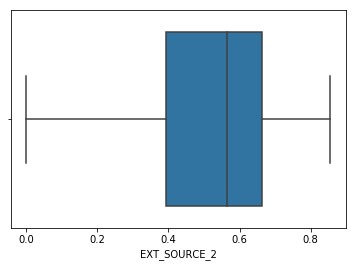

In [51]:
sns.boxplot(application['EXT_SOURCE_2'].dropna(inplace=False))
plt.show()

Ext_Source_2 is continuous variable and Since there is no outlier in it, we can impute the null values with the Mean() of the column.

#### Ext_Source_3 Variable

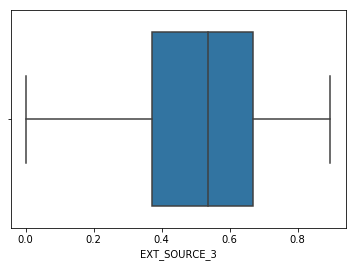

In [52]:
sns.boxplot(application['EXT_SOURCE_3'].dropna(inplace=False))
plt.show()

Ext_Source_3 is continuous variable and Since there is no outlier in it, we can impute the null values with the Mean() of the column.


#### OBS_30_CNT_SOCIAL_CIRCLE Variable 

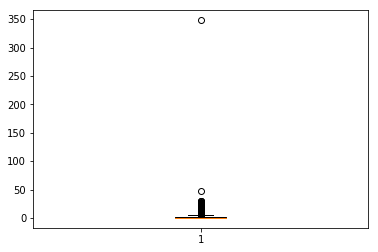

In [53]:
plt.boxplot(application['OBS_30_CNT_SOCIAL_CIRCLE'].dropna(inplace=False))
plt.show()

OBS_30_CNT_SOCIAL_CIRCLE variable is a continuous Variable.

Since there are significatnt outliers in the variable OBS_30_CNT_SOCIAL_CIRCLE which can alter the mean of the variable, we can impute the null values with the Median() of the column.

#### Name_Type_Suite Varable

In [54]:
application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

NAME_TYPE_SUITE is a categorical variable.
We can use mode() to impute the null values in the variable NAME_TYPE_SUITE.

The mode can be imputed as :
application['NAME_TYPE_SUITE']=application['NAME_TYPE_SUITE'].fillna(application['NAME_TYPE_SUITE'].mode()[0]) 

#### AMT_GOODS_PRICE

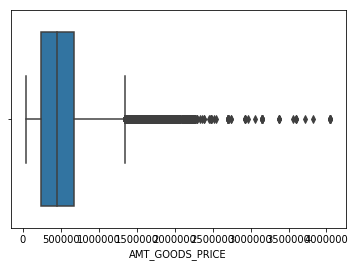

In [55]:
sns.boxplot(application.AMT_GOODS_PRICE.dropna(inplace=False))
plt.show()

AMT_GOODS_PRICE is a continuous variable.
Since the variable has outliers, we can impute the null values with Median()

#### AMT_REQ_CREDIT_BUREAU_YEAR

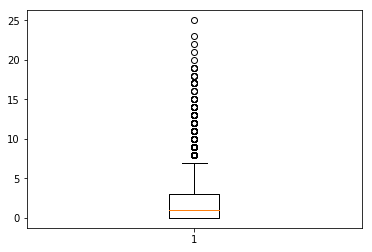

In [56]:
plt.boxplot(application.AMT_REQ_CREDIT_BUREAU_YEAR.dropna(inplace=False))
plt.show()

AMT_REQ_CREDIT_BUREAU_YEAR is a continuous variable.
Since the variable has outliers, we can impute the null values with Median()

In [57]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting the data type of the variables as per nature of the data provided.

In [58]:
application.nunique().sort_values() #gives no. of unique values in a variable/column

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

#### Converting the Categorical data from int to Object type

In [59]:
to_obj=['REG_CITY_NOT_LIVE_CITY','FLAG_EMAIL','FLAG_DOCUMENT_9','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_16',
        'FLAG_DOCUMENT_15','FLAG_PHONE','FLAG_DOCUMENT_14','FLAG_DOCUMENT_12','FLAG_DOCUMENT_11','FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
        'FLAG_DOCUMENT_13','FLAG_CONT_MOBILE','FLAG_DOCUMENT_10','FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_DOCUMENT_17',
        'FLAG_DOCUMENT_18','TARGET','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_OWN_CAR','FLAG_OWN_REALTY'
        ,'FLAG_WORK_PHONE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

application.loc[:, to_obj] = application.loc[:, to_obj].astype(object)

#### Converting the negative variables to Absolute.

In [60]:
#Columns having negative values which doesnot comply with the nature of type of data.
#e.g Days columns cannot be negative in any circumstance.

application['DAYS_REGISTRATION']=application['DAYS_REGISTRATION'].abs().astype(int)
application['DAYS_BIRTH']=application['DAYS_BIRTH'].abs()
application['DAYS_EMPLOYED']=application['DAYS_EMPLOYED'].abs()
application['DAYS_ID_PUBLISH']=application['DAYS_ID_PUBLISH'].abs().astype(int)
application['CNT_FAM_MEMBERS']=application['CNT_FAM_MEMBERS'].abs()

Since the column DAYS_LAST_PHONE_CHANGE has one null value, so if we try to convert it to int32, it throws error as 'Cannot convert non-finite values (NA or inf) to integer'

In [61]:
application['DAYS_LAST_PHONE_CHANGE'] = application['DAYS_LAST_PHONE_CHANGE'].astype(int).abs()

ValueError: Cannot convert non-finite values (NA or inf) to integer

To overcome the issue faced above : 
1. We can impute the NA/inf value with mean or median depending on the outliers.
2. We can use to_numeric funciton of pandas to convert it to float and take absolute of that.

In [62]:
# we are using to_numeric function:
application['DAYS_LAST_PHONE_CHANGE'] =pd.to_numeric(application['DAYS_LAST_PHONE_CHANGE'].abs(),errors='coerce')

### To check if the variables has outliers.

#### AMT_INCOME_TOTAL

In [63]:
#describe the AMT_INCOME_TOTAL variable
application.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

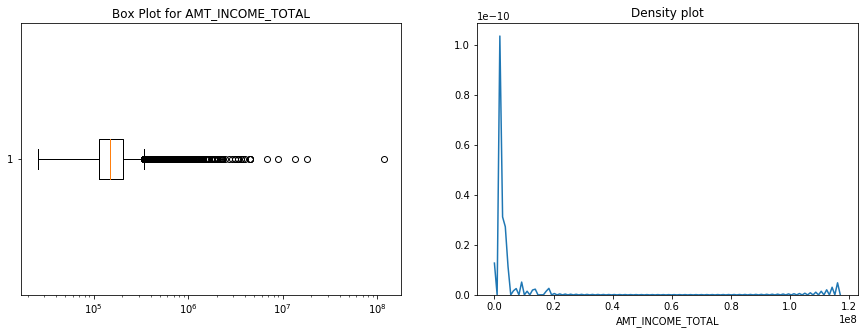

In [64]:
# figure size
plt.figure(figsize=(15,5))

# subplots
# subplot 1
plt.subplot(1, 2, 1)
plt.title('Box Plot for AMT_INCOME_TOTAL')
plt.boxplot(application['AMT_INCOME_TOTAL'],vert=False)
plt.xscale('log')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Density plot')
sns.distplot(application['AMT_INCOME_TOTAL'], hist=False)
plt.show()

AMT_INCOME_TOTAL graph, both box plot and density plot shows that it has outliers and one extreme outlier which is responsible for causing deviation in mean().


#### AMT_CREDIT

In [65]:
#describe the AMT_CREDIT variable
application.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

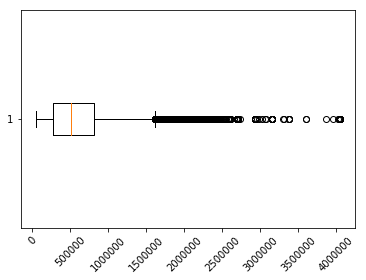

In [66]:
plt.boxplot(application['AMT_CREDIT'],vert=False)
plt.xticks(Rotation='45')
plt.show()


AMT_CREDIT variable box plot shows that there are significant number of outliers.

#### AMT_GOODS_PRICE

In [67]:
#describe the AMT_GOODS_PRICE variable
application.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

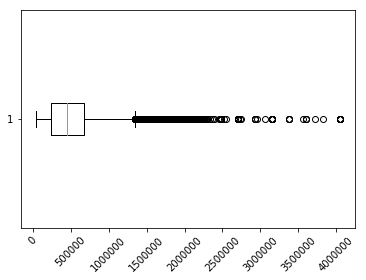

In [68]:
plt.boxplot(application['AMT_GOODS_PRICE'].dropna(),vert=False)
plt.xticks(Rotation='45')
plt.show()

AMT_GOODS_PRICE box plot shows that there are a lot of outliers and specifically, there are two-three extreme outiers.

#### EXT_SOURCE_2

In [69]:
#Describe on EXT_SOURCE_2
application.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

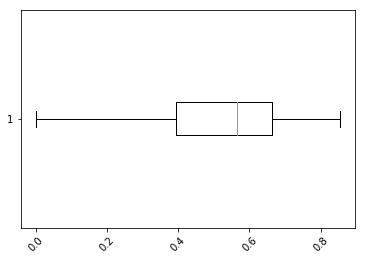

In [70]:
plt.boxplot(application['EXT_SOURCE_2'].dropna(),vert=False)
plt.xticks(Rotation='45')
plt.show()

EXT_SOURCE_2 box plot shows that there nop outliers hence the mean() and median for the variable are at same place.
#### DAYS_LAST_PHONE_CHANGE

In [71]:
#Describe on Days_Last_Phone_Change
application.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

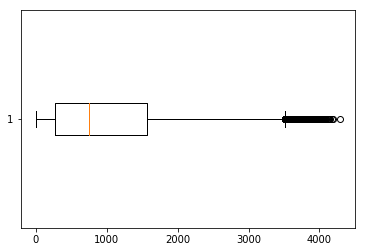

In [72]:
plt.boxplot(application.DAYS_LAST_PHONE_CHANGE.dropna(),vert=False)
plt.show()

The DAYS_LAST_PHONE_CHANGE box plot shows that it has outliers at extreme end.
### We can convert the the Continuous variables into Categorical for better analysis.
##### We can binn few variables like AMT_INCOME_TOTAL and DAYS_BIRTH to get a clearer picture.

In [73]:
#Converting the Days_Birth to years and Add a new column for Age Group.
application['AGE_GROUP']=(application.loc[:,'DAYS_BIRTH']/365).astype(int)
application.AGE_GROUP.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_GROUP, dtype: float64

In [74]:
#Binning
application['AGE_GROUP'] = pd.cut(application['AGE_GROUP'],[19,25,35,45,55,65,75], labels = ['19-25','25-35','35-45','45-55','55-65','65-75'])

In [75]:
application.AGE_GROUP.value_counts() # Check the value count

35-45    83677
25-35    75925
45-55    69501
55-65    57081
19-25    16318
65-75     5009
Name: AGE_GROUP, dtype: int64

In [76]:
#Performing describe and quantile on AMT_INCOME_TOTAL
application.AMT_INCOME_TOTAL.describe() #To get the min, and max values
application.AMT_INCOME_TOTAL.quantile([.99,1]) # to get the actual percentage of highest value as the difference between 75% and max is very high.

0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [77]:
#Binning of AMT_INCOME_TOTAL into new column INCOME_RANGE
application['INCOME_RANGE'] = pd.cut(application['AMT_INCOME_TOTAL'],[25649,112500,202500,472500,117000000], labels = ['Low','Low-Medium','Medium-High','High'])

#### Checking the imbalance percentage of the data with respect to Target variable

In [78]:
(100 * application.TARGET.value_counts())/len(application)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

So, within the given data, the targeted members are around 8 % while the non targeted members are around 92%

### Dividing the datset into two sets based on TARGET variable - 0 and 1

In [79]:
Target1 = application.loc[application['TARGET']==1,:]
Target0 = application.loc[application['TARGET']==0,:]

In [80]:
Target1.info()
Target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 75 columns):
SK_ID_CURR                     24825 non-null int64
TARGET                         24825 non-null object
NAME_CONTRACT_TYPE             24825 non-null object
CODE_GENDER                    24825 non-null object
FLAG_OWN_CAR                   24825 non-null object
FLAG_OWN_REALTY                24825 non-null object
CNT_CHILDREN                   24825 non-null int64
AMT_INCOME_TOTAL               24825 non-null float64
AMT_CREDIT                     24825 non-null float64
AMT_ANNUITY                    24825 non-null float64
AMT_GOODS_PRICE                24804 non-null float64
NAME_TYPE_SUITE                24755 non-null object
NAME_INCOME_TYPE               24825 non-null object
NAME_EDUCATION_TYPE            24825 non-null object
NAME_FAMILY_STATUS             24825 non-null object
NAME_HOUSING_TYPE              24825 non-null object
REGION_POPULATION_RELATIVE     24825 non

### Univariate Analysis
#### Categorical Univariate Analysis

##### 1. NAME_INCOME_TYPE

In [81]:
Target1.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

In [82]:
Target0.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.507807
Commercial associate    0.234384
Pensioner               0.185294
State servant           0.072356
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

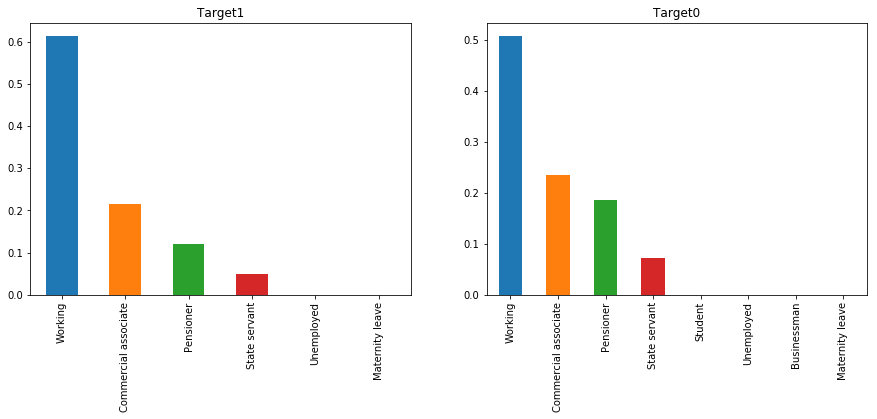

In [83]:
#Analysis for both Target 1 and Target 0

# figure size
plt.figure(figsize=(15,5))

#plot the bar graph of percentage NAME_INCOME_TYPE categories
plt.subplot(1, 2, 1)
plt.title('Target1')
Target1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()# Target = 1

#plot the bar graph of percentage NAME_INCOME_TYPE categories
plt.subplot(1, 2, 2)
plt.title('Target0')
Target0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()# Target = 0
plt.show()

From the bar graph plotted for Dataframes Target0 and Target1, we can draw the analysis based on Income Type of Members that the members whose income_type is of Business i.e Businessmen are not at all a risk factor.
The People on Maternity leave are less likely and Working members are most likely to be a Defaulter.

##### AGE_GROUP

In [84]:
Target0.AGE_GROUP.value_counts(normalize=True) #Value count for each Categories of AGE_GROUP in Target0

35-45    0.271623
25-35    0.240153
45-55    0.229021
55-65    0.191134
19-25    0.050947
65-75    0.017121
Name: AGE_GROUP, dtype: float64

In [85]:
Target1.AGE_GROUP.value_counts(normalize=True) #Value count for each Categories of AGE_GROUP in Target1

25-35    0.323746
35-45    0.277664
45-55    0.191742
55-65    0.122860
19-25    0.077180
65-75    0.006808
Name: AGE_GROUP, dtype: float64

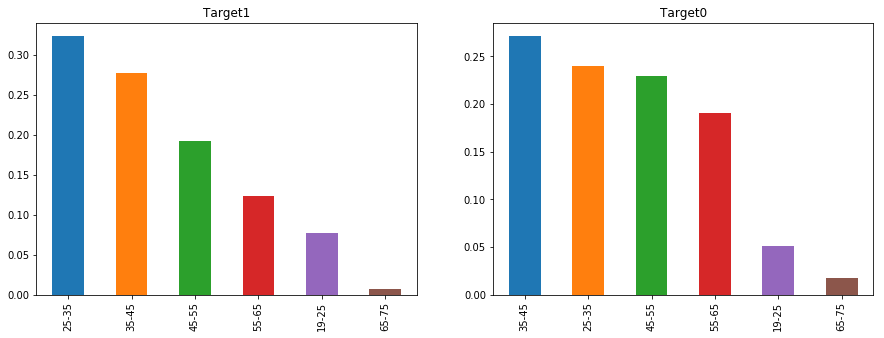

In [86]:
#Analysis for both Target 1 and Target 0

# figure size
plt.figure(figsize=(15,5))

#plot the bar graph of percentage AGE_GROUP categories
plt.subplot(1, 2, 1)
plt.title('Target1')
Target1.AGE_GROUP.value_counts(normalize=True).plot.bar()# Target = 1

#plot the bar graph of percentage AGE_GROUP categories
plt.subplot(1, 2, 2)
plt.title('Target0')
Target0.AGE_GROUP.value_counts(normalize=True).plot.bar()# Target = 0
plt.show()

From the bar graph plotted for Dataframes Target0 and Target1, we can draw the analysis based on Age-Group that the members who come under Age-Group 25-35 are most and 35-45 are second most and 65-75 Age-Group are the least likely to be a Defaulter. 
Whereas in Target0 Plot, Age-Group 35-45 is turning out to be the most loyal Customers.

##### INCOME_RANGE

In [87]:
Target0.INCOME_RANGE.value_counts(normalize=True) #Value count for each Categories of INCOME_RANGE in Target0

Low-Medium     0.438494
Low            0.325927
Medium-High    0.225490
High           0.010089
Name: INCOME_RANGE, dtype: float64

In [88]:
Target1.INCOME_RANGE.value_counts(normalize=True) #Value count for each Categories of INCOME_RANGE in Target1

Low-Medium     0.460785
Low            0.340101
Medium-High    0.192588
High           0.006526
Name: INCOME_RANGE, dtype: float64

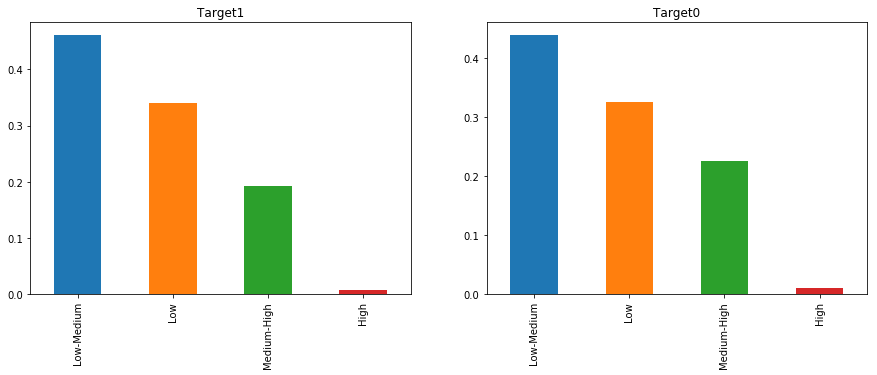

In [89]:
#Analysis for both Target 1 and Target 0

# figure size
plt.figure(figsize=(15,5))

#plot the bar graph of percentage AGE_GROUP categories
plt.subplot(1, 2, 1)
plt.title('Target1')
Target1.INCOME_RANGE.value_counts(normalize=True).plot.bar()# Target = 1

#plot the bar graph of percentage AGE_GROUP categories
plt.subplot(1, 2, 2)
plt.title('Target0')
Target0.INCOME_RANGE.value_counts(normalize=True).plot.bar()# Target = 0
plt.show()

As we can see from above graph, categories of INCOME_RANGE in both Target1 and Target0 have similar pattern.
This column is not suffiecient to infer whether it actually affects the Target variable.

##### NAME_EDUCATION_TYPE 

In [90]:
Target0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [91]:
Target1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

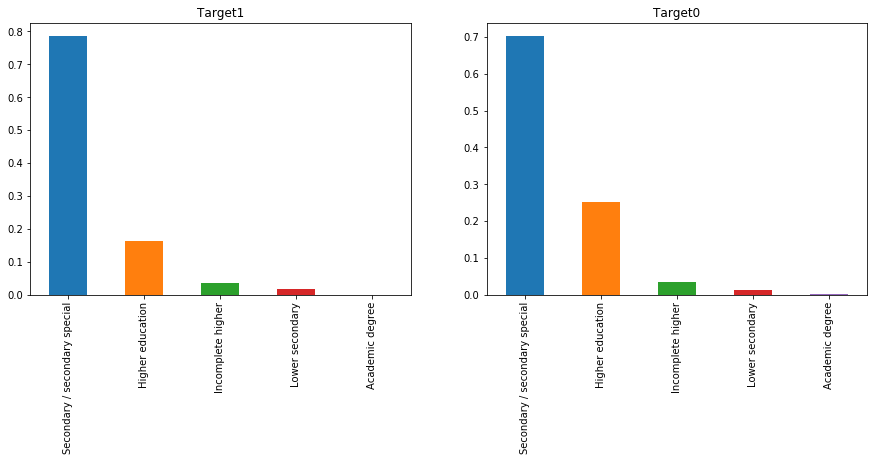

In [92]:
#Analysis for both Target 1 and Target 0

# figure size
plt.figure(figsize=(15,5))

#plot the bar graph of percentage NAME_EDUCATION_TYPE categories
plt.subplot(1, 2, 1)
plt.title('Target1')
Target1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()# Target = 1

#plot the bar graph of percentage NAME_EDUCATION_TYPE categories
plt.subplot(1, 2, 2)
plt.title('Target0')
Target0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()# Target = 0
plt.show()

From the bar plotted above for both Target1 and Target0, its not easy to infer anything based on the Education Type of the Member as both the graphs are turning out to be similar.

##### CODE_GENDER

In [93]:
Target0.CODE_GENDER.value_counts(normalize=True)

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

In [94]:
Target1.CODE_GENDER.value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

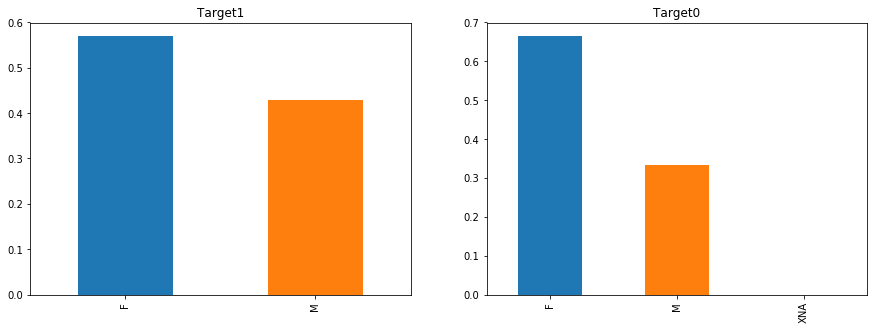

In [95]:
#Analysis for both Target 1 and Target 0

# figure size
plt.figure(figsize=(15,5))

#plot the bar graph of percentage CODE_GENDER categories
plt.subplot(1, 2, 1)
plt.title('Target1')
Target1.CODE_GENDER.value_counts(normalize=True).plot.bar()# Target = 1

#plot the bar graph of percentage CODE_GENDER categories
plt.subplot(1, 2, 2)
plt.title('Target0')
Target0.CODE_GENDER.value_counts(normalize=True).plot.bar()# Target = 0
plt.show()

From the Graph plotted for both Target1 and Target0 with respect to Gender, Female members are coming out as most likely to be a Defaulter and also the most loyal Customers. And the people with Gender as XNA are not a threat at all.

#### Numerical Univariate Analysis

##### AMT_CREDIT

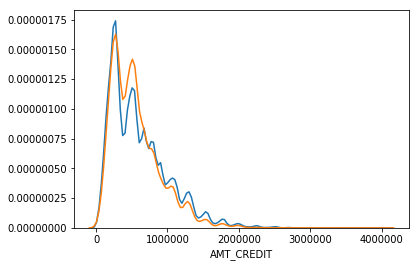

In [96]:
# Analyse continuous column with respect to the target column

sns.distplot(Target0['AMT_CREDIT'], hist = False)# Target = No
sns.distplot(Target1['AMT_CREDIT'], hist = False)# Taget = Yes

From the plot above, we can see that the members with Less Credit Amount are both Loyal and most defaulted Customers for Target0 and Target1.

##### CNT_CHILDREN

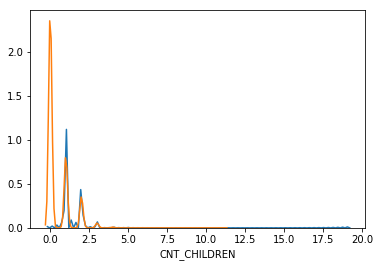

In [97]:
sns.distplot(Target0['CNT_CHILDREN'], hist = False)# Target = No
sns.distplot(Target1['CNT_CHILDREN'], hist = False)# Taget = Yes

It is very evident from the plotted graph, that the members with no Children are most likely to be Defaulter and the people with 1-2 children are the most loyal ones.

##### EXT_SOURCE_3

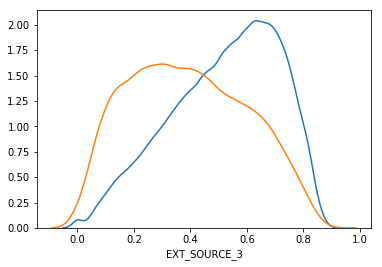

In [98]:
sns.distplot(Target0['EXT_SOURCE_3'], hist = False)# Target = No
sns.distplot(Target1['EXT_SOURCE_3'], hist = False)# Taget = Yes

The Members whose score for EXT_SOURCE_3 is less and falls between 0.2 to 0.3 are most likely to be Defaulters. and The people with score between 0.6 to 0.7 are the most loyal ones.

##### DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE

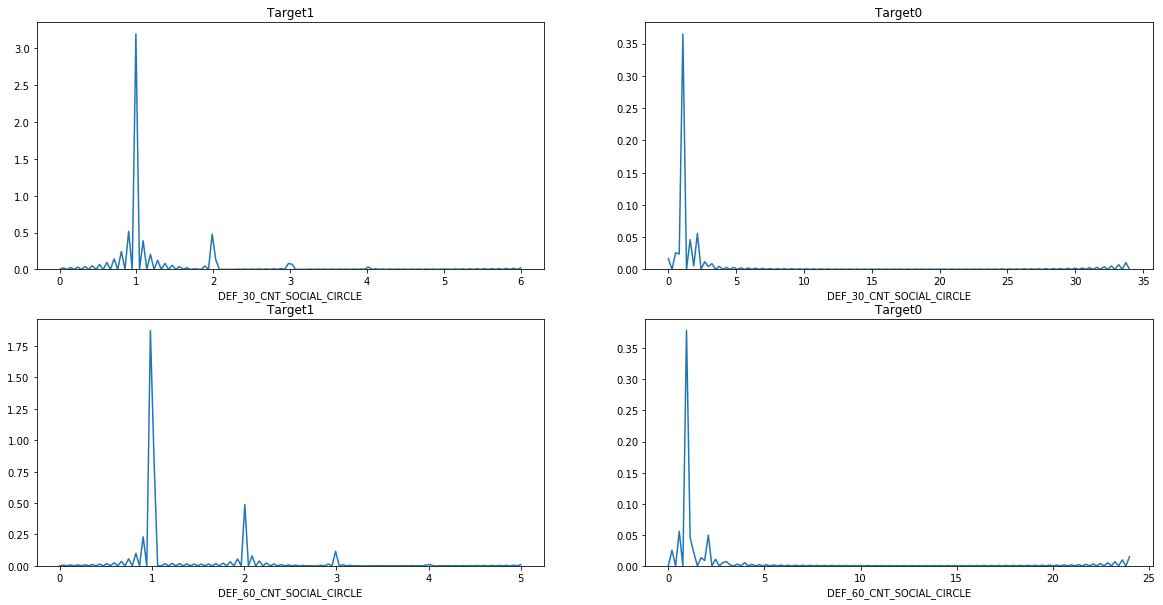

In [99]:

#Analysis for both Target 1 and Target 0

# figure size
plt.figure(figsize=(20,10))

#plot the bar graph of percentage CODE_GENDER categories
plt.subplot(2, 2, 1)
plt.title('Target1')
sns.distplot(Target1['DEF_30_CNT_SOCIAL_CIRCLE'], hist = False)# Target = 1

#plot the bar graph of percentage CODE_GENDER categories
plt.subplot(2, 2, 2)
plt.title('Target0')
sns.distplot(Target0['DEF_30_CNT_SOCIAL_CIRCLE'], hist = False)# Target = 0


#plot the bar graph of percentage CODE_GENDER categories
plt.subplot(2, 2, 3)
plt.title('Target1')
sns.distplot(Target1['DEF_60_CNT_SOCIAL_CIRCLE'], hist = False)# Target = 1

#plot the bar graph of percentage CODE_GENDER categories
plt.subplot(2, 2, 4)
plt.title('Target0')
sns.distplot(Target0['DEF_60_CNT_SOCIAL_CIRCLE'], hist = False)# Target = 0
plt.show()


From the above graph, we can see that there is no significant difference between the values of DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE for both Target0 and Target1. Same pattern can be observed for OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE variables as well. So, we can drop these columns. The same goes for AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR.

In [100]:
#Dropping the columns.
columns = ['DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',
           'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
application.drop(columns,inplace=True,axis=1)

#### Correlation of the Numerical Variables

##### Target1

In [101]:
corr = Target1.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corrTarget1 = corr.unstack().reset_index()
corrTarget1.columns=['Variable1','Variable2','Correlation']
corrTarget1.dropna(subset=['Correlation'],inplace=True)
corrTarget1.Correlation = round(abs(corrTarget1['Correlation']),4)
corrTarget1.sort_values(by='Correlation', ascending=False)

,Variable1,Variable2,Correlation
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.9983
133,AMT_GOODS_PRICE,AMT_CREDIT,0.9831
287,CNT_FAM_MEMBERS,CNT_CHILDREN,0.8855
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.8690
134,AMT_GOODS_PRICE,AMT_ANNUITY,0.7527
107,AMT_ANNUITY,AMT_CREDIT,0.7522
215,DAYS_EMPLOYED,DAYS_BIRTH,0.5822
458,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.3372
431,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.3338
241,DAYS_REGISTRATION,DAYS_BIRTH,0.2891


##### Target0

In [102]:
corr = Target0.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corrTarget0 = corr.unstack().reset_index()
corrTarget0.columns=['Variable1','Variable2','Correlation']
corrTarget0.dropna(subset=['Correlation'],inplace=True)
corrTarget0.Correlation = round(abs(corrTarget0['Correlation']),4)
corrTarget0.sort_values(by='Correlation', ascending=False)

,Variable1,Variable2,Correlation
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.9985
133,AMT_GOODS_PRICE,AMT_CREDIT,0.9873
287,CNT_FAM_MEMBERS,CNT_CHILDREN,0.8786
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.8593
134,AMT_GOODS_PRICE,AMT_ANNUITY,0.7767
107,AMT_ANNUITY,AMT_CREDIT,0.7713
215,DAYS_EMPLOYED,DAYS_BIRTH,0.6261
106,AMT_ANNUITY,AMT_INCOME_TOTAL,0.4190
132,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.3495
80,AMT_CREDIT,AMT_INCOME_TOTAL,0.3428


So, once we find the Correlation between the Numerical Variables for both Target1 and Target0, we can see that the variables OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE are the ones with highest correlation in both the dataframes.

But as seen earlier in the desity plot, these columns are hardly making any effect on the Target Variable. So, it doesn't mean that they affect each other but have linear relationship between them.

So, if we see the second row in the correaltion matrix which is having AMT_GOODS_PRICE and AMT_CREDIT variables are correlated and also tend to have relation between them but it is still not clear to tell which one is cause and which one is effect.


#### Bivariate Analysis on Numerical data

###### Numerical - Numerical Variable

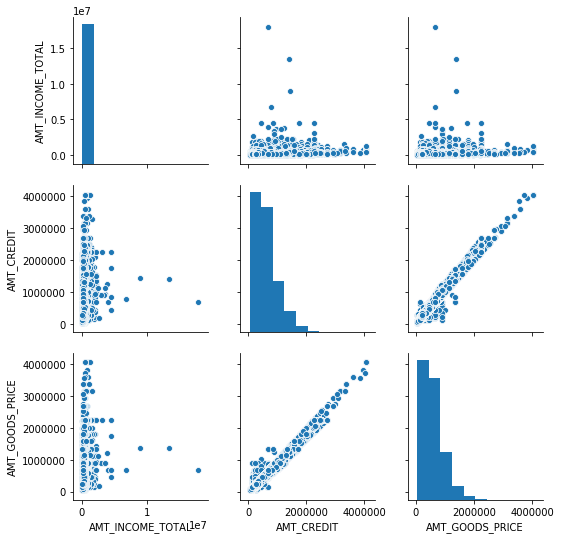

In [61]:
#pair plot of AMT_INCOME_TOTAL, AMT_CREDIT and AMT_GOODS_PRICE in Target0 dataframe.
sns.pairplot(Target0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE']])

AMT_CREDIT and AMT_GOODS are highly correlated in Target0 dataframe.

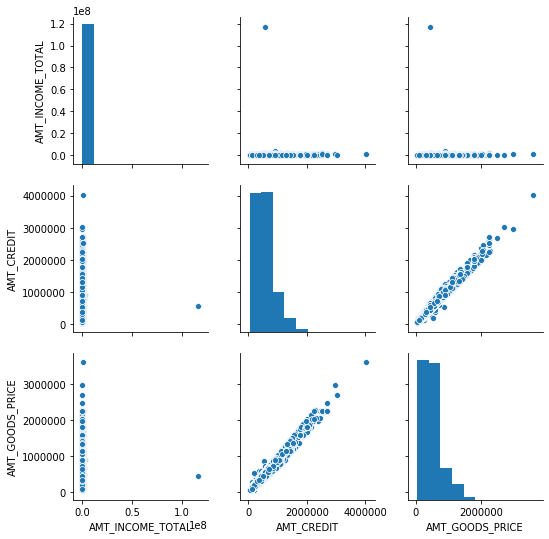

In [62]:
#pair plot of AMT_INCOME_TOTAL, AMT_CREDIT and AMT_GOODS_PRICE in Target1 dataframe.
sns.pairplot(Target1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE']])

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated in Target1 dataframe.

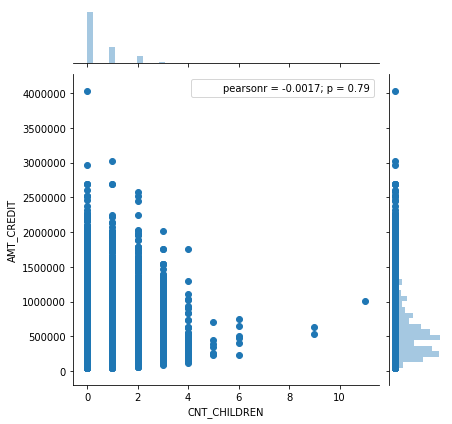

In [103]:
#plot the scatter plot of CNT_CHILDREN and AMT_GOODS_PRICE variable in Target1
sns.jointplot('CNT_CHILDREN','AMT_CREDIT',Target1)
plt.scatter(Target1.CNT_CHILDREN,Target1.AMT_CREDIT)

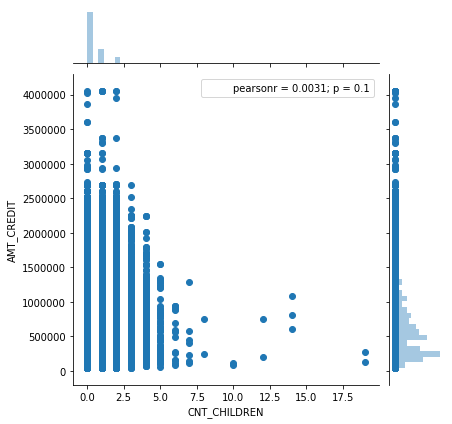

In [104]:
#plot the scatter plot of CNT_CHILDREN and AMT_GOODS_PRICE variable in Target0
sns.jointplot('CNT_CHILDREN','AMT_CREDIT',Target0)
plt.scatter(Target0.CNT_CHILDREN,Target0.AMT_CREDIT)

As from the graphs above, members with less number of children(pricisely no children) along with low credit amount are more likely to be defaulted and also most loyal customers.

### Read Previous Applications

In [105]:
#To display all the columns
pd.set_option('display.max_columns', 37)
# Reading the application_data file
prevApplication = pd.read_csv('previous_application.csv')

In [106]:
prevApplication.shape
prevApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#Checking for null variables in PrevApplication.
print(round((((prevApplication.isnull().sum())/len(prevApplication.index))*100),2))
#Dropping the columns with null percentage >50
prevApplication.drop(prevApplication[prevApplication.columns[prevApplication.isnull().mean() > 0.47]],axis=1,inplace=True)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [108]:
prevApplication.info() #Information on all the columns
prevApplication.shape #To get the total rows and columns of prevApplication

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 32 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

(1670214, 32)

#### Merging the PrevApplication with Current Application 

In [109]:
# Merging the dataframes
# Note that SK_ID_CURR is the common column/key, which is provided to the 'on' argument
# how = 'left' makes sure that all the records in application data frame are retained.
df_1 = pd.merge(application,prevApplication,how='left', on='SK_ID_CURR')
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,...,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,...,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,...,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,...,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [110]:
#Drop the entirely duplicates values across the columns
df_1.drop_duplicates(inplace=True)
df_1.shape

(1430155, 96)

In [111]:
#Imbalance percentage with respect to Target Variable in df_1
(df_1.TARGET.value_counts()/len(df_1) )*100

0    91.37576
1     8.62424
Name: TARGET, dtype: float64

As we saw earlier the imbalance percentage with respect to TARGET in application was 92% non targeted and 8% targeted.
But, after merging the percent has changed by 1% i.e 91% non targeted and 9% Targeted in df_1.

In [112]:
#Imbalance percentage with respect to NAME_CONTRACT_STATUS Variable in df_1
(df_1.NAME_CONTRACT_STATUS.value_counts()/len(df_1) )*100

Approved        61.958249
Canceled        18.140761
Refused         17.158280
Unused offer     1.592205
Name: NAME_CONTRACT_STATUS, dtype: float64






### Univariate Analysis
#### Categorical Unordered Variables

##### NAME_TYPE_SUITE

In [113]:
#calculate the percentage of each NAME_TYPE_SUITE category.
df_1.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.818498
Family             0.130569
Spouse, partner    0.033217
Children           0.009881
Other_B            0.004810
Other_A            0.002160
Group of people    0.000865
Name: NAME_TYPE_SUITE, dtype: float64

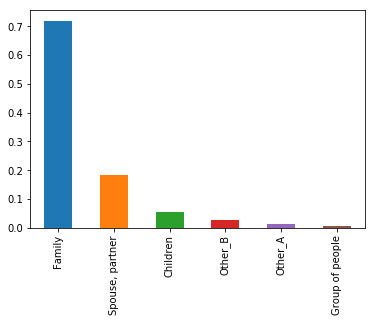

In [114]:
#plot the bar chart of NAME_TYPE_SUITE categories
df_1[~(df_1.NAME_TYPE_SUITE=='Unaccompanied')].NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()

As we can see from the value counts, the percentage of Unaccompanied are the highest. So, to get a clearer graph, we plot all other values except unaccompanied.

##### NAME_CONTRACT_TYPE_y

In [115]:
#calculate the percentage of each NAME_CONTRACT_TYPE_y category.
df_1.NAME_CONTRACT_TYPE_y.value_counts(normalize=True)

Cash loans         0.443350
Consumer loans     0.442283
Revolving loans    0.114146
XNA                0.000221
Name: NAME_CONTRACT_TYPE_y, dtype: float64

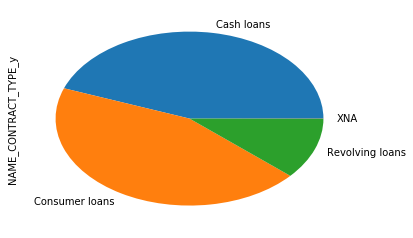

In [116]:
#plot the pie chart of NAME_CONTRACT_TYPE_y categories
df_1.NAME_CONTRACT_TYPE_y.value_counts(normalize=True).plot.pie()

After merging, the percentage of Consumer loans and Cash loans are almost same. while in the application(before merge), there were only two types of loan with Cash loans having the highest percentage.


#### Categorical Ordered Variables

##### NAME_YIELD_GROUP

In [117]:
#calculate the percentage of each NAME_YIELD_GROUP category.
df_1.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA           0.303599
middle        0.229873
high          0.216496
low_normal    0.194443
low_action    0.055590
Name: NAME_YIELD_GROUP, dtype: float64

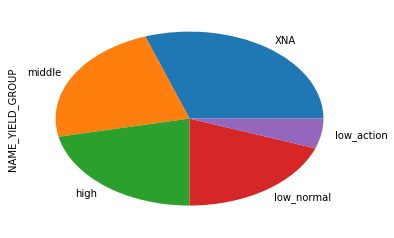

In [118]:
#plot the pie chart of NAME_CONTRACT_TYPE_y categories
df_1.NAME_YIELD_GROUP.value_counts(normalize=True).plot.pie()

From this we can infer that the percentage of members who have not grouped their interest into low, medium or high groups is high and the members with low_action interest groups are less.

##### AGE_GROUP

In [119]:
#calculate the percentage of each AGE_GROUP category.
df_1.AGE_GROUP.value_counts(normalize=True)

35-45    0.274265
25-35    0.237581
45-55    0.227188
55-65    0.201773
19-25    0.040044
65-75    0.019150
Name: AGE_GROUP, dtype: float64

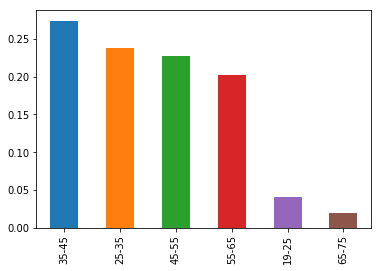

In [120]:
#plot the pie chart of AGE_GROUP categories
df_1.AGE_GROUP.value_counts(normalize=True).plot.bar()

From the above graph, we can infer that the members within age-group 35-45 are high in number and the ones within age-group 65-75 are less in number.

##### INCOME_RANGE

In [121]:
#calculate the percentage of each INCOME_RANGE category.
df_1.INCOME_RANGE.value_counts(normalize=True)

Low-Medium     0.456033
Low            0.290985
Medium-High    0.244119
High           0.008863
Name: INCOME_RANGE, dtype: float64

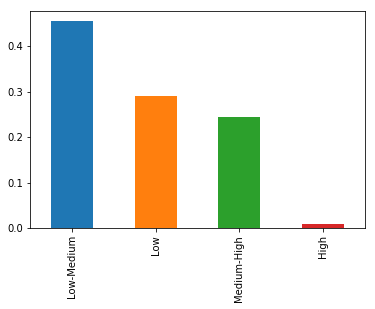

In [122]:
#plot the pie chart of INCOME_RANGE categories
df_1.INCOME_RANGE.value_counts(normalize=True).plot.bar()

From the above graph, we can infer that the members within income range Low-Medium are high in number and the ones within age-group High are less than 1% in number

### Bivariate Analysis :

#### Categorical-Categorical Variable

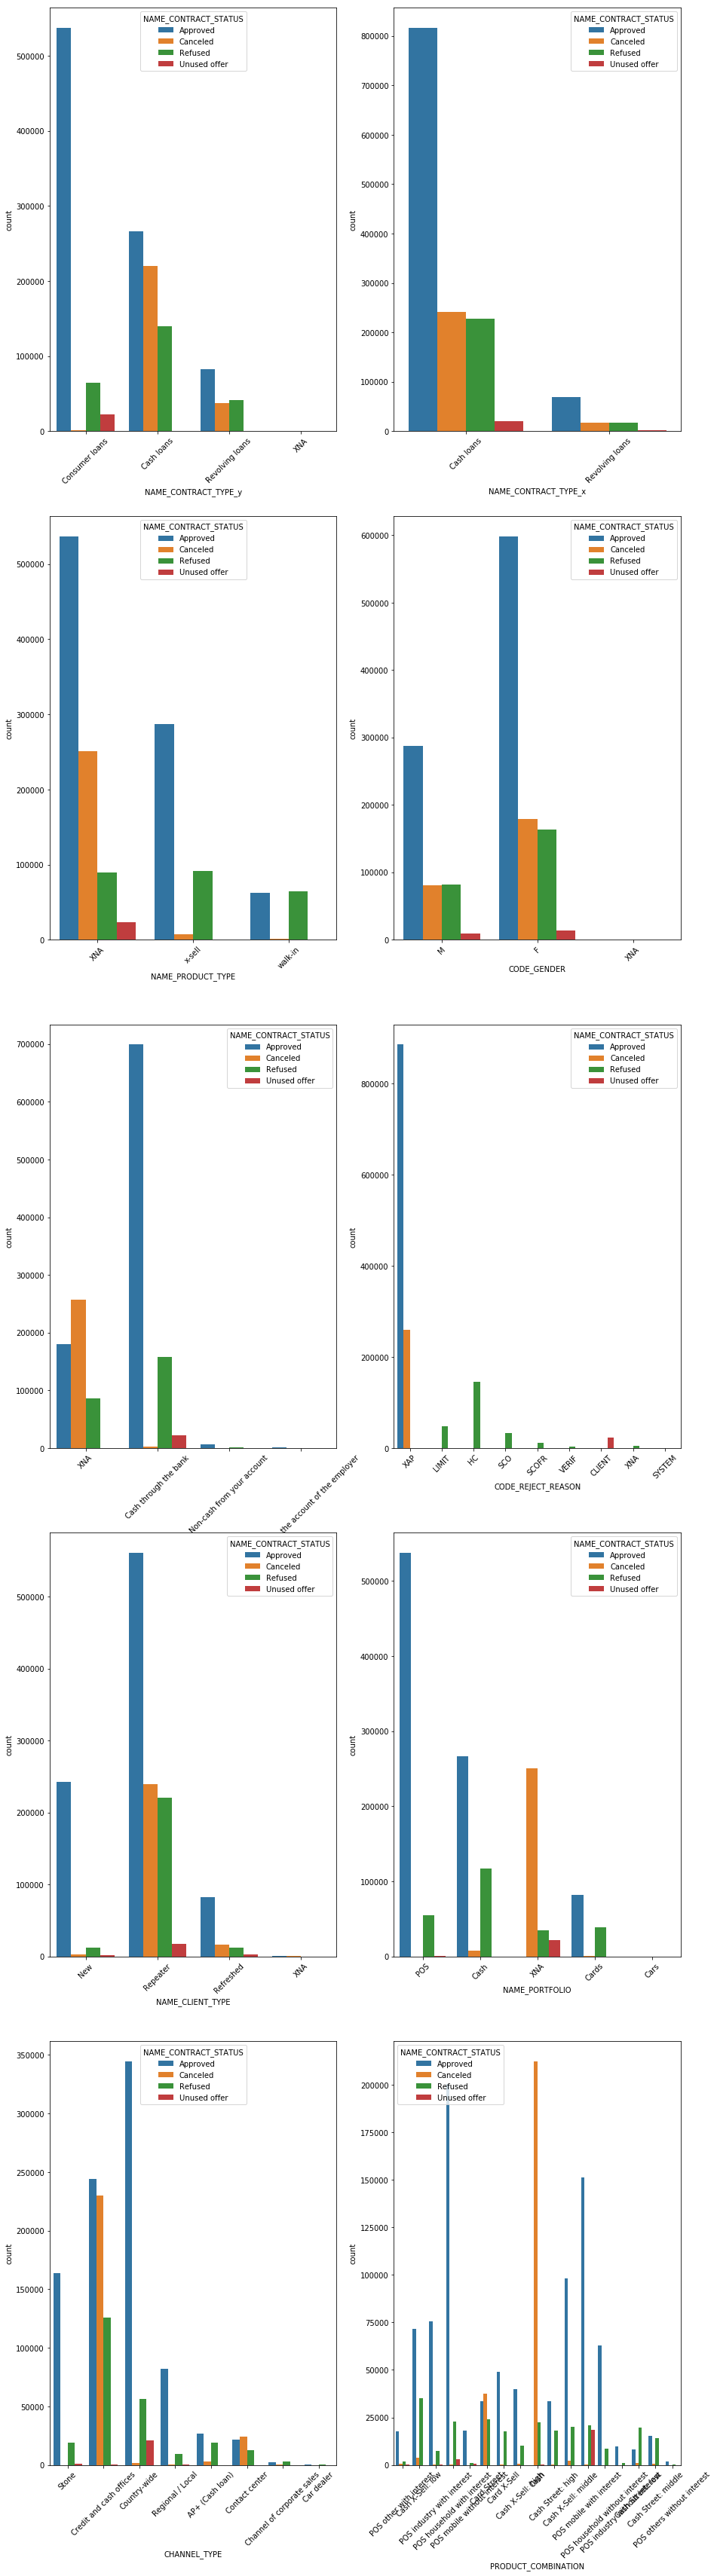

In [123]:
# We can plot mutiple categorical columns with respect to NAME_CONTRACT_STATUS columns: Subplot

df_1.columns 

columns = ['NAME_CONTRACT_TYPE_y','NAME_CONTRACT_TYPE_x','NAME_PRODUCT_TYPE','CODE_GENDER','NAME_PAYMENT_TYPE',
           'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE','PRODUCT_COMBINATION']


plt.figure(figsize = (15, 60))
for i in enumerate(columns):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = df_1)
    plt.xticks(rotation = 45)

Summary of the Bivariate analysis on Categorical Columns : 

1. NAME_CONTRACT_TYPE_y :
        Approved : Members who have Contract_Type as Consumer Loans. 
        Canceled : People who have applied for cash loans tend to cancel the application the most.
        Refused : Members who have Contract_Type as Cash Loans.
        Unused Offer : Customers who have applied for consumer loans tend to not use the offer
2. NAME_CONTRACT_TYPE_x :
        Approved : Members who have Contract_Type as Cash Loans. 
        Canceled : People who have applied for cash loans tend to cancel the application the most.
        Refused : Members who have Contract_Type as Cash Loans.
        Unused Offer : Customers who have applied for cash loans tend to not use the offer
3. NAME_PRODUCT_TYPE :
        Approved : Members who have Product_Type as XNA.
        Canceled : Members who have XNA as the Product_Type are more likely to cancel the application.
        Refused : According to the value_count, the percentage of XNA Product_type is high, and even though x-sell product type is less in number, it has refusal almost similar to XNA, hence we can say that members with Product_Types as x-sell are more likely to be rejected.
        Unused offer : Members who have XNA as the Product_Type are more likely to not use the offer.
4. CODE_GENDER :
        Approved : Members who have Gender as Female.
        Refused : Members who have Gender as Female.
        Also, the percentage of Female customers is large in number which makes it difficult to understand the trend.
5. NAME_PAYMENT_TYPE :
        Approved : Members who have selected Payment_Type as Cash through the bank.
        Canceled : Members who have XNA category tend to cancel the application.
        Refused : Members who have selected Payment_Type as Cash through the bank.
        Also, the percentage of Cash through the bank as Payment-Type customers is large in number which doesn't tend to make any impact.
        Unused offer : People who have chosen cash through bank are more likey to not use offer.
6. CODE_REJECT_REASON : 
        Refused : Members who are most likely to be rejected are having the reason as 'HC'.
        Canceled : Members who have XAP as code reject reason have cancelled their application.
7. NAME_CLIENT_TYPE :
        Members who are Repeating clients are the ones having high Approval rate as well as Refusal rate. Also, repeating customers are more likely to not use the offer.
8. NAME_PORTFOLIO : 
        Approved : Members who have Loan type as POS[Consumer_Loan].
        Canceled : Members who have XNA as Name_Portfolio tend to cancel the application
        Refused : Members who have Loan type as as Cash.
9. CHANNEL_TYPE :
        Approved : Members who are selected Country-wide.
        Canceled : Members who have selected credit and cash offices are more likely to cancel the application.
        Refused : Members who are selected from Credit and cash offices.
        Unused Offer : Members who have selecte Country-wide tend to not use the offer.

As we can see, the NAME_PORTFOLIO and NAME_CONTRACT_TYPE_y aree having the same categories and have the same meaning, we can drop one of them.

In [124]:
#drop NAME_CONTRACT_TYPE_y

df_1.drop('NAME_CONTRACT_TYPE_y',axis=1,inplace=True)

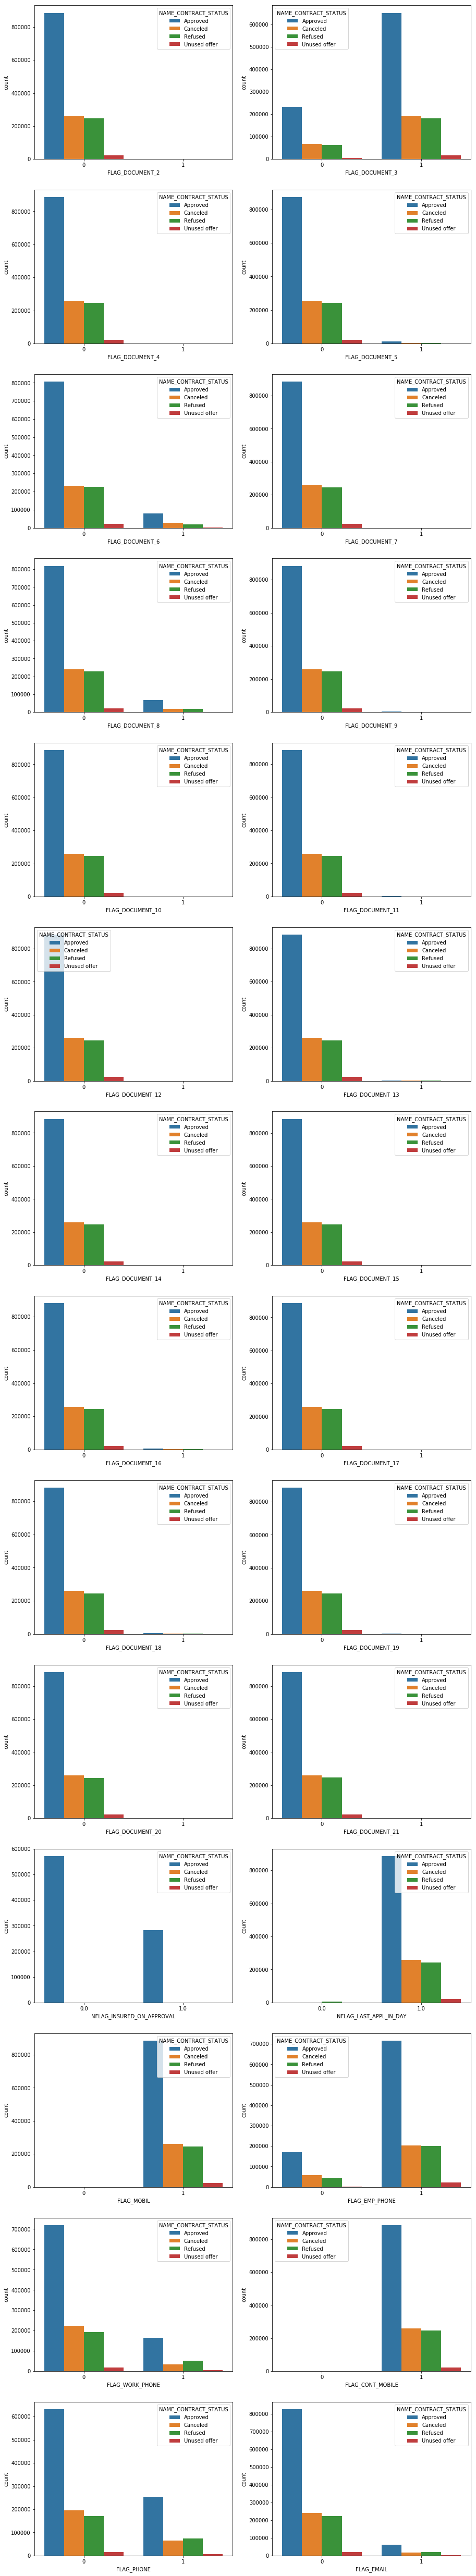

In [125]:
# We can plot mutiple categorical columns with respect to NAME_CONTRACT_STATUS columns: Subplot

df_1.columns 

columns = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
           'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','NFLAG_INSURED_ON_APPROVAL','NFLAG_LAST_APPL_IN_DAY','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL']

plt.figure(figsize = (15, 90))
for i in enumerate(columns):
    plt.subplot(14, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'NAME_CONTRACT_STATUS', data = df_1)

As we can see from the above graph, there is no clear inference that we can make, there is no relation between the Flag type and the Customer getting rejected or Apporoved.

In [126]:
#Dropping the Flag Variables:
columns = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
           'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','NFLAG_INSURED_ON_APPROVAL','NFLAG_LAST_APPL_IN_DAY','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL']
df_1.drop(columns,axis=1,inplace=True)

In [127]:
df_1.shape

(1430155, 67)

#### Categorical_Numerical Variable

In [128]:
#Converting the DAYS_DECISION to Absolute value:

df_1.DAYS_DECISION = df_1.DAYS_DECISION.abs()

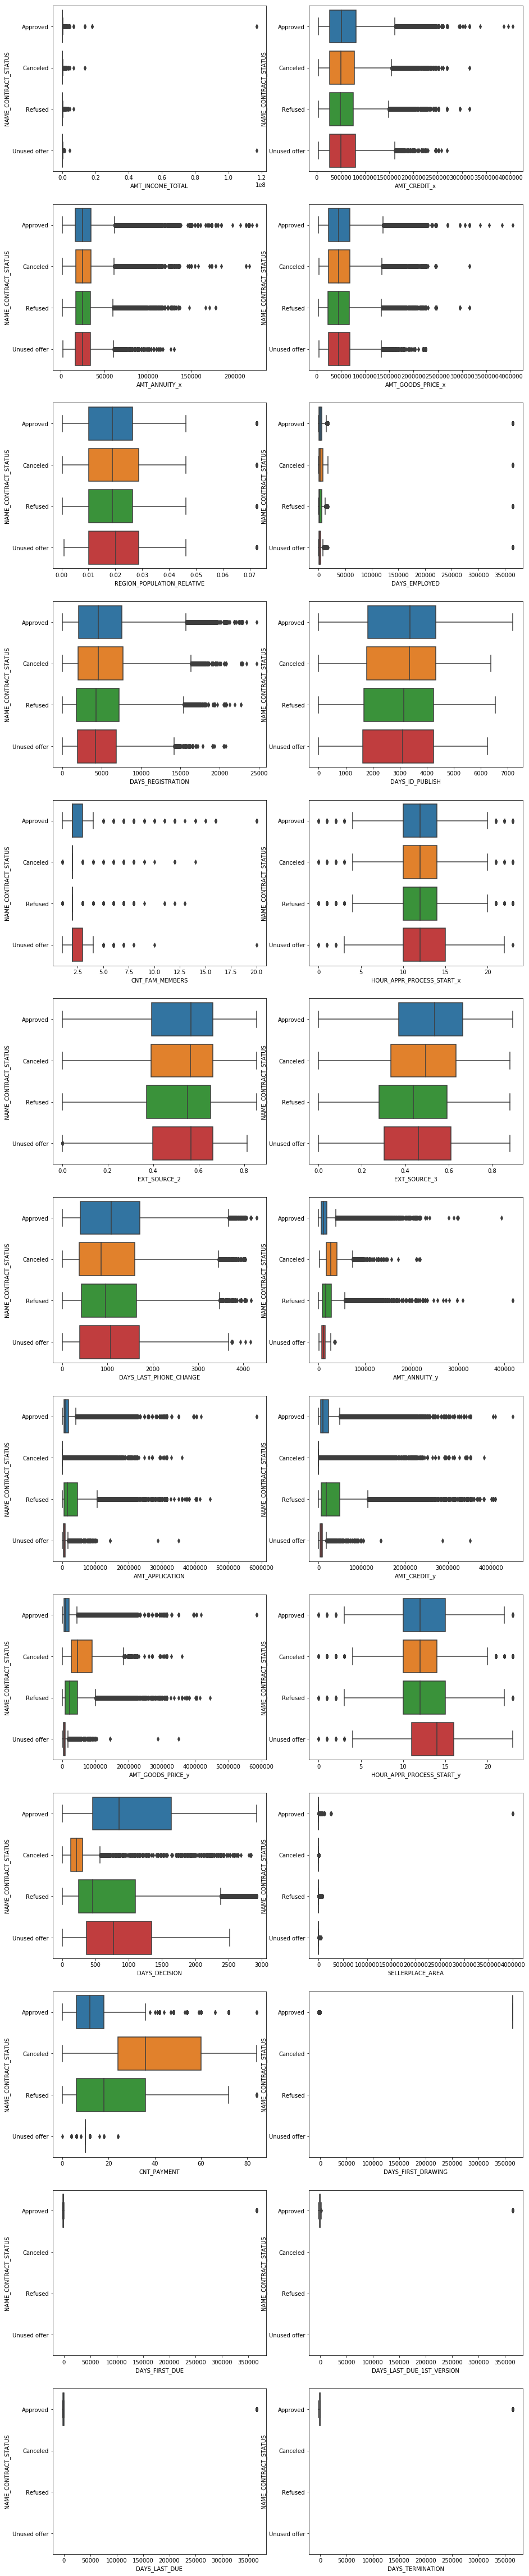

In [130]:
# We can plot mutiple Numerical columns with respect to NAME_CONTRACT_STATUS columns: Subplot

df_1.columns 

columns = ['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
           'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','EXT_SOURCE_2'
           ,'EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y',
           'HOUR_APPR_PROCESS_START_y','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE'
           ,'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']

plt.figure(figsize = (15, 90))
for i in enumerate(columns):
    plt.subplot(14, 2, i[0]+1)
    sns.boxplot(x = i[1],y = 'NAME_CONTRACT_STATUS' , data = df_1)

As we can see in above graph, there is no significant difference between Approved and Refused Mean and Median for 'AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',           'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START_x','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE',     'HOUR_APPR_PROCESS_START_y','SELLERPLACE_AREA','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
'DAYS_LAST_DUE','DAYS_TERMINATION' variables are quite similar and doesn't tend to impact the decision.

So we can drop these variables.

In [131]:
#Dropping the columns:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START_x','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START_y','SELLERPLACE_AREA','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE','DAYS_TERMINATION']
df_1.drop(columns,axis=1,inplace=True)

#### Calculating the mean and median for numerical-categorical value

In [132]:
#calculate the mean, median of CNT_FAM_MEMBERS with NAME_CONTRACT_STATUS
df_1.groupby('NAME_CONTRACT_STATUS')['CNT_FAM_MEMBERS'].agg(['mean','median'])

,mean,median
NAME_CONTRACT_STATUS,,
Approved,2.167476,2.0
Canceled,2.107207,2.0
Refused,2.126118,2.0
Unused offer,2.246015,2.0


We had performed Mean and Median operations on CNT_FAM_MEMBERS based on NAME_CONTRACT_STATUS becuase it was not clear from the box plot. Once we perform mean and median operation, we find that the value for mean is almost similar across all categories.

#### Correlation calculation for Numerical Variables

In [133]:
corr = df_1.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corrdf_1 = corr.unstack().reset_index()
corrdf_1.columns=['Variable1','Variable2','Correlation']
corrdf_1.dropna(subset=['Correlation'],inplace=True)
corrdf_1.Correlation = round(abs(corrdf_1['Correlation']),4)
corrdf_1.sort_values(by='Correlation', ascending=False)

,Variable1,Variable2,Correlation
115,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.9999
116,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.9932
103,AMT_CREDIT_y,AMT_APPLICATION,0.9757
37,CNT_FAM_MEMBERS,CNT_CHILDREN,0.8789
114,AMT_GOODS_PRICE_y,AMT_ANNUITY_y,0.8222
102,AMT_CREDIT_y,AMT_ANNUITY_y,0.8180
90,AMT_APPLICATION,AMT_ANNUITY_y,0.8100
139,CNT_PAYMENT,AMT_APPLICATION,0.6831
140,CNT_PAYMENT,AMT_CREDIT_y,0.6755
141,CNT_PAYMENT,AMT_GOODS_PRICE_y,0.6745


AMT_GOODS_PRICE_y and AMT_APPLICATION have the highest correlation between them. It is the same with AMT_GOODS_PRICE_y and AMT_CREDIT_y. These variables have the highest relationship between them. Although we can't say which is cause and which is effect, we can know that they have linear relationship.

